In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\d.csv").dropna()


In [3]:
df

,Year,flow
181,01/07/1963,54.30
182,02/07/1963,43.20
183,03/07/1963,56.40
184,04/07/1963,43.60
185,05/07/1963,51.60
...,...,...
20957,18/05/2020,104.53
20958,19/05/2020,92.61
20959,20/05/2020,75.58
20960,21/05/2020,62.44


In [4]:
df = df.set_index('Year')

<AxesSubplot:xlabel='Year'>

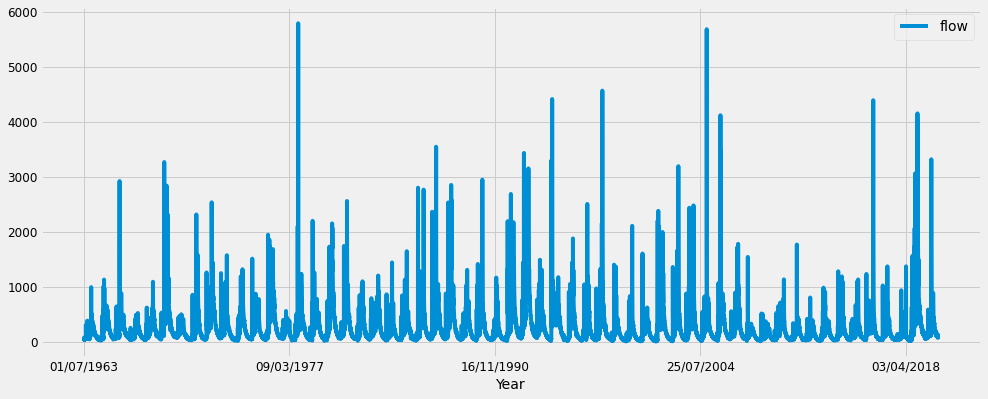

In [5]:
df.plot(figsize = (15,6))

In [6]:
df = pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\d.csv", parse_dates=['Year']).dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 181 to 20961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    20781 non-null  datetime64[ns]
 1   flow    20781 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 487.1 KB


In [8]:
df.describe()

,flow
count,20781.000000
mean,244.456114
std,297.610205
min,10.150000
25%,72.600000
50%,144.900000
75%,307.730000
max,5797.300000


In [9]:
df.shape

(20781, 2)

In [10]:
#time series analysis and forecasting.
data = df[['Year', 'flow']]

In [11]:
data.shape

(20781, 2)

In [12]:
data = data.groupby('Year')['flow'].sum().reset_index()

In [13]:
#Indexing with Time Series Data
data = data.set_index('Year')
data.index

DatetimeIndex(['1963-01-07', '1963-01-08', '1963-01-09', '1963-01-10',
               '1963-01-11', '1963-01-12', '1963-02-07', '1963-02-08',
               '1963-02-09', '1963-02-10',
               ...
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-12-01', '2020-12-02', '2020-12-03',
               '2020-12-04', '2020-12-05'],
              dtype='datetime64[ns]', name='Year', length=20781, freq=None)

In [14]:
#Our current datetime data can be tricky to work with, therefore, we will use the averages Montly Flow.
y = data['flow'].resample('M').mean() #Monthly Mean
#y = data['flow'].resample('Q').mean() # Quaterly Mean
#y = data['flow'].resample('SM').mean() #SM : semi-month end frequency (15th and end of month)
#y = data['flow'].resample('W').mean() #Weekly avearge  

In [15]:
#We can also visualize our data using a method called time-series decomposition that allows us to decompose
#our time series into three distinct components: 
#trend, seasonality, and noise.

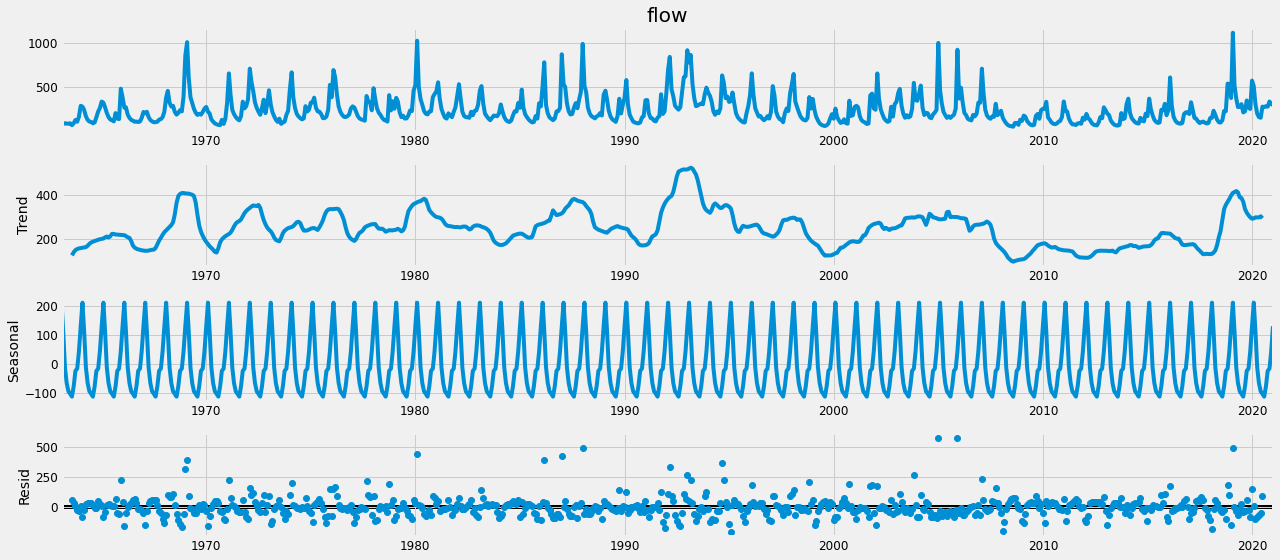

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). 
#These three parameters account for seasonality, trend, and noise in data:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Grid Serach

This step is parameter Selection for our data SARIMAX Time Series Model.
Our goal here is to use a “grid search” to find the optimal set of parameters
that yields the best performance for our model.

# SARIMAX IMPLEMENTAION

In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            #mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal, enforce_invertibility=False)
           
            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9862.768239683774
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9287.319794052159
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8899.088184088203
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8442.06631170769
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8863.915724548599
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8590.484570035744
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8634.658148595827
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8430.504441527793
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9304.100307364304
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8914.654773328079
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8746.995831280812
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8248.696617625901
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8695.094749390031
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8389.71136431516
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8487.15243233951
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8246.035136740436
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8718.84133425742
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - 

# The above output suggests that SARIMAX(1, 0, 1)x(0, 1, 1, 12) yields the lowest AIC value of 8112
Therefore we should consider this to be optimal option.

In [19]:
#Fitting the SARIMAX model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                               # enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8381      0.035     23.751      0.000       0.769       0.907
ma.L1         -0.3929      0.047     -8.364      0.000      -0.485      -0.301
ma.S.L12      -1.0000     15.538     -0.064      0.949     -31.453      29.453
sigma2      9802.6909   1.52e+05      0.064      0.949   -2.89e+05    3.08e+05


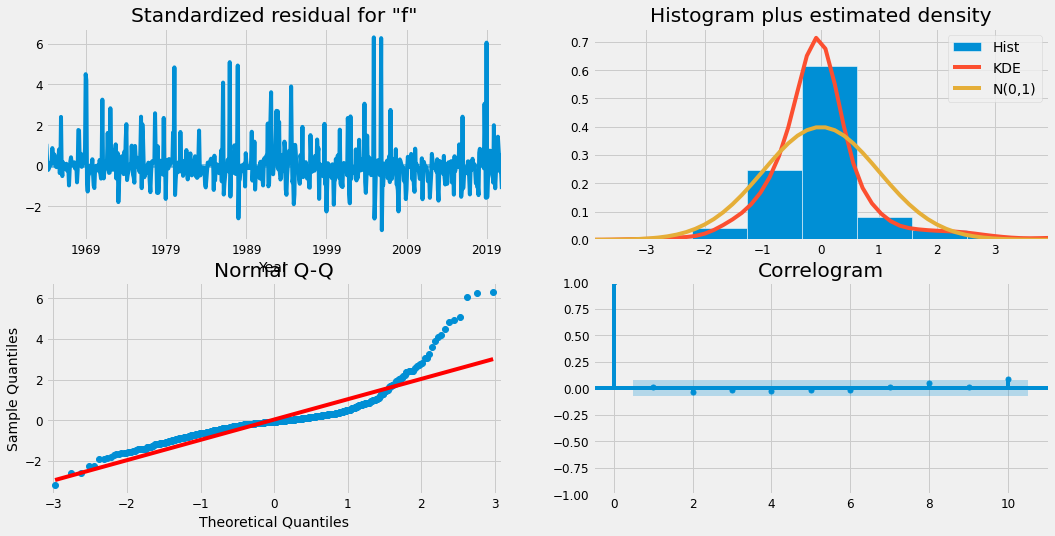

In [20]:
#We should always run model diagnostics to investigate any unusual behavior.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

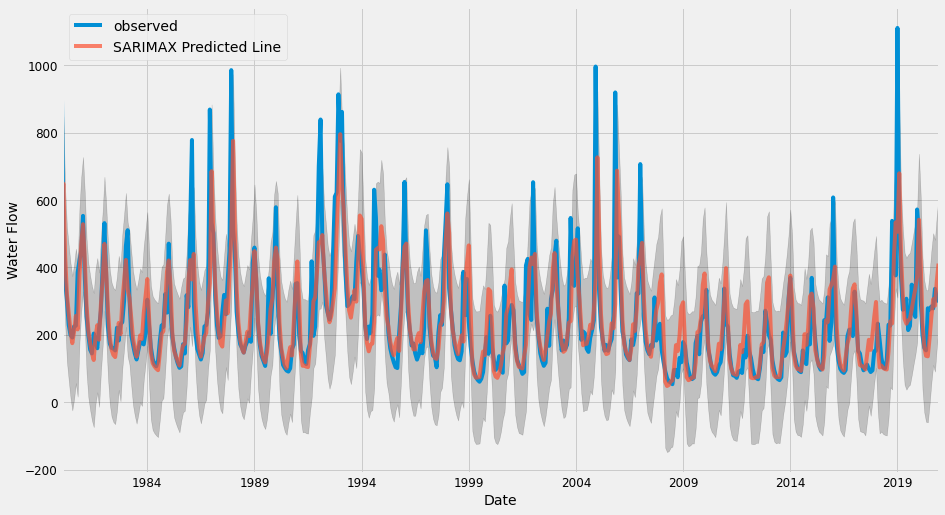

In [21]:
pred1 = results.get_prediction(start=pd.to_datetime('1980-01-31'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1980':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

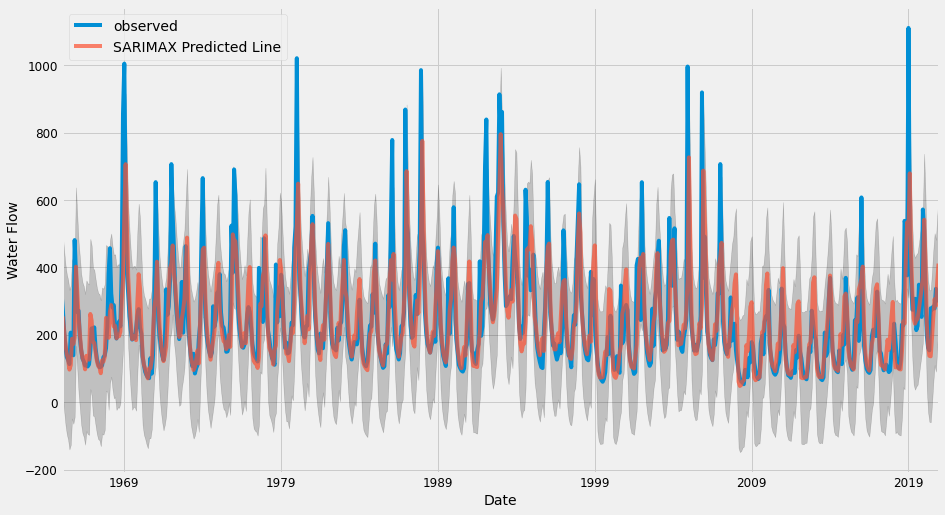

In [22]:
pred1 = results.get_prediction(start=pd.to_datetime('1965-01-31'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1965':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

In [23]:
forecast1 = pred1.predicted_mean
actual1 = y
print('The SARIMAX Mean Aboslute Percentage Error of our forecasts is {}'.format(np.mean(np.abs(forecast1 - actual1)/np.abs(actual1))))

The SARIMAX Mean Aboslute Percentage Error of our forecasts is 0.22779406635966584


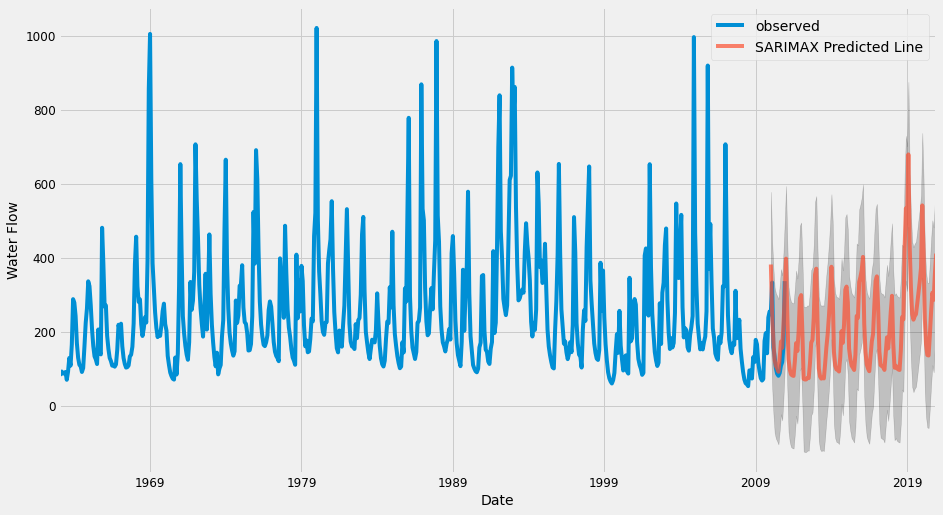

In [24]:
pred1 = results.get_prediction(start=pd.to_datetime('2010-01-31'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1963':'2010'].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

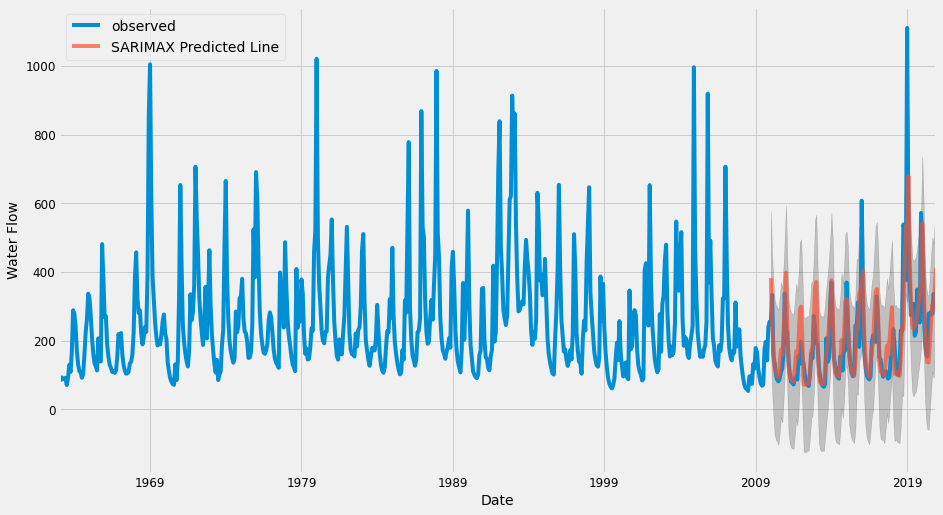

In [25]:
pred1 = results.get_prediction(start=pd.to_datetime('2010-01-31'), dynamic=False)
pred_ci1 = pred1.conf_int()
ax = y['1963':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='SARIMAX Predicted Line', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:, 0], pred_ci1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

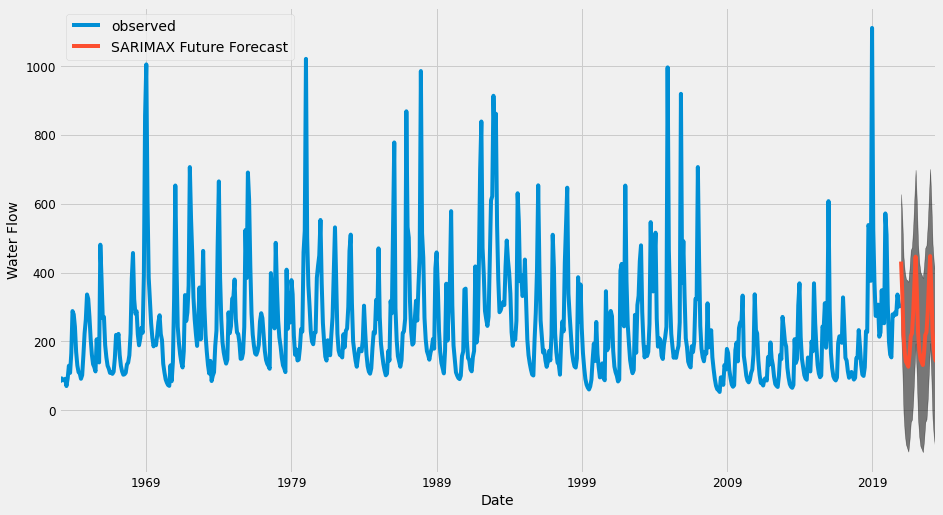

In [26]:
#Producing and visualizing forecasts
pred_uc1 = results.get_forecast(steps=30)
pred_ci1 = pred_uc1.conf_int()
ax = y.plot(label='observed', figsize=(14, 8))
pred_uc1.predicted_mean.plot(ax=ax, label='SARIMAX Future Forecast')
ax.fill_between(pred_ci1.index,
                pred_ci1.iloc[:, 0],
                pred_ci1.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()


# ARIMA IMPLEMENTATION

In [125]:
# Testing For Stationary 
from statsmodels.tsa.stattools import adfuller 

In [126]:
test_result = adfuller(y)

In [127]:
#H0 : it is non stationary 
#H1 : it is stationary 

def adfuller_test(y):
    result = adfuller(y)
    labels = [' ADF Test statistic',' p-value ','lags used']
    for value, label in zip(result, labels):
              print(label+ ':' +str(value))
    if result[1] <= 0.05:
              print('Strong Evidence againt null hypothesis(H0), reject the null hypothesis. Data has no unit root and Stationary ')
    else:
              print('Week Evidence againt null hypothesis, time series has unit root, indicating it is non stationary')

In [128]:
adfuller_test(y)

 ADF Test statistic:-4.968240438471589
 p-value :2.5639630329922853e-05
lags used:14
Strong Evidence againt null hypothesis(H0), reject the null hypothesis. Data has no unit root and Stationary 


In [129]:
from pmdarima import auto_arima
#Ignore harmless warnings 
import warnings 
warnings.filterwarnings('ignore')

In [130]:
stepwise_fit = auto_arima(y,trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8611.285, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9036.071, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8622.055, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8749.010, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9876.048, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8621.163, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8625.496, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8623.882, Time=0.77 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8582.340, Time=0.78 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8620.305, Time=0.44 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8593.758, Time=0.82 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=8631.055, Time=0.30 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8566.826, Time=1.08 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : 

In [131]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [132]:
model=sm.tsa.arima.ARIMA(y,order=(3,0,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   flow   No. Observations:                  696
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -4248.492
Date:                Sat, 16 Apr 2022   AIC                           8514.984
Time:                        21:43:13   BIC                           8555.893
Sample:                    01-31-1963   HQIC                          8530.802
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.9537     24.202     10.080      0.000     196.518     291.389
ar.L1          2.7297      0.002   1093.108      0.000       2.725       2.735
ar.L2         -2.7274      0.005   -567.328      0.000      -2.737      -2.718
ar.L3          0.9976      0.003    386.715      0.000       0.993       1.003
ma.L1         -2.2340      0.034    -65.278      0.000      -2.301      -2.167
ma.L2          1.6255      0.091     17.869      0.000       1.447       1.804
ma.L3         -0.0951      0.100     -0.955      0.339      -0.290       0.100
ma.L4         -0.2293      0.044     -5.207      0.000      -0.316      -0.143
sigma2      1.385e+04    577.281     23.991      0.000    1.27e+04     1.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              3791.56
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             2.42
Prob(H) (two-sided):                  0.04   Kurtosis:                        13.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+17. Standard errors may be unstable.
"""

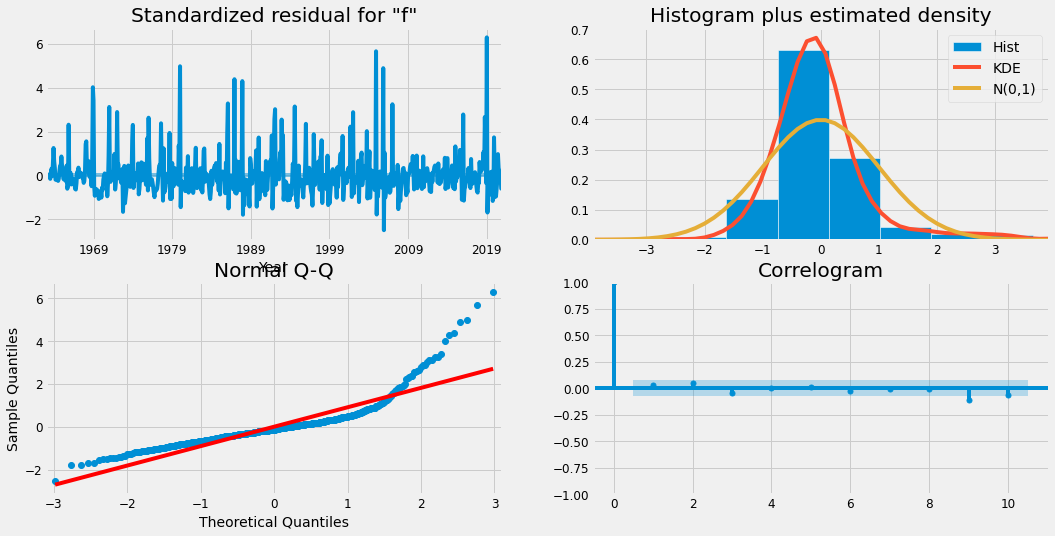

In [133]:
#We should always run model diagnostics to investigate any unusual behavior.
model.plot_diagnostics(figsize=(16, 8))
plt.show()

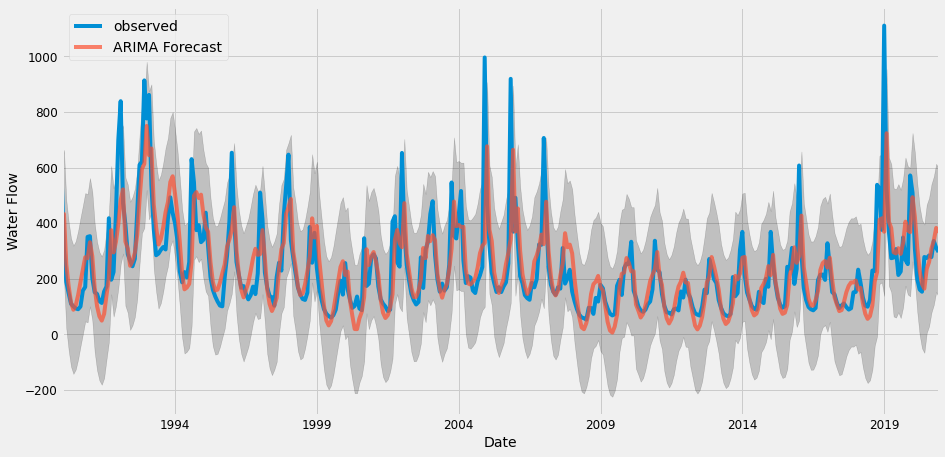

In [134]:
pred = model.get_prediction(start=pd.to_datetime('1990-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

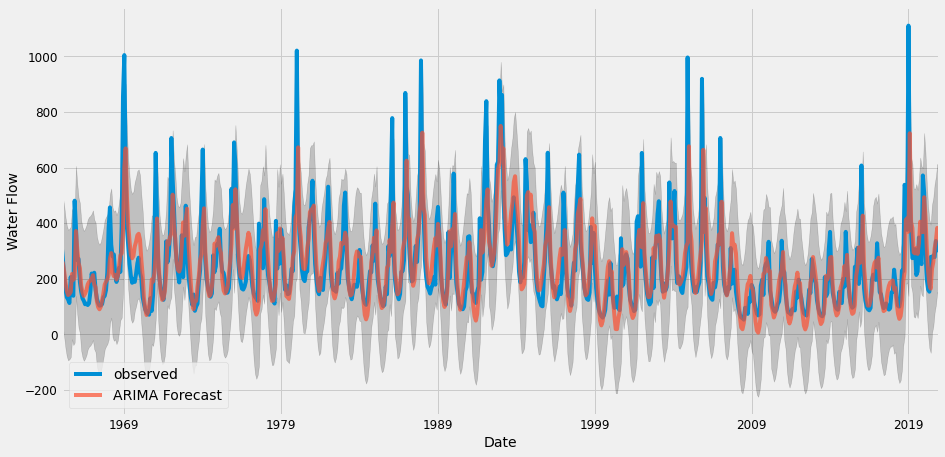

In [135]:
pred = model.get_prediction(start=pd.to_datetime('1965-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1965':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

In [136]:
forecast = pred.predicted_mean
actual = y
print('The ARIMA Mean Aboslute Percentage Error of our forecasts is {}'.format(np.mean(np.abs(forecast - actual)/np.abs(actual))))

The ARIMA Mean Aboslute Percentage Error of our forecasts is 0.27720198382842676


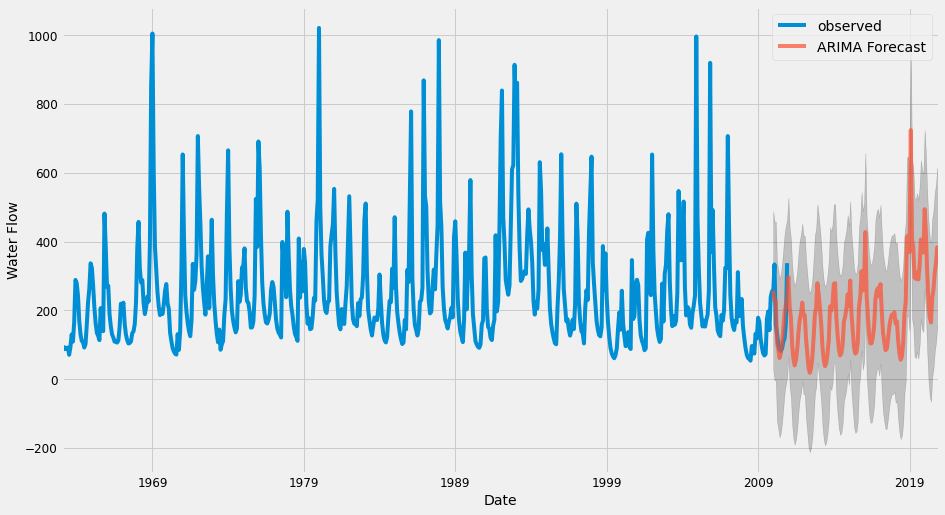

In [137]:
pred = model.get_prediction(start=pd.to_datetime('2010-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1963':'2010'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

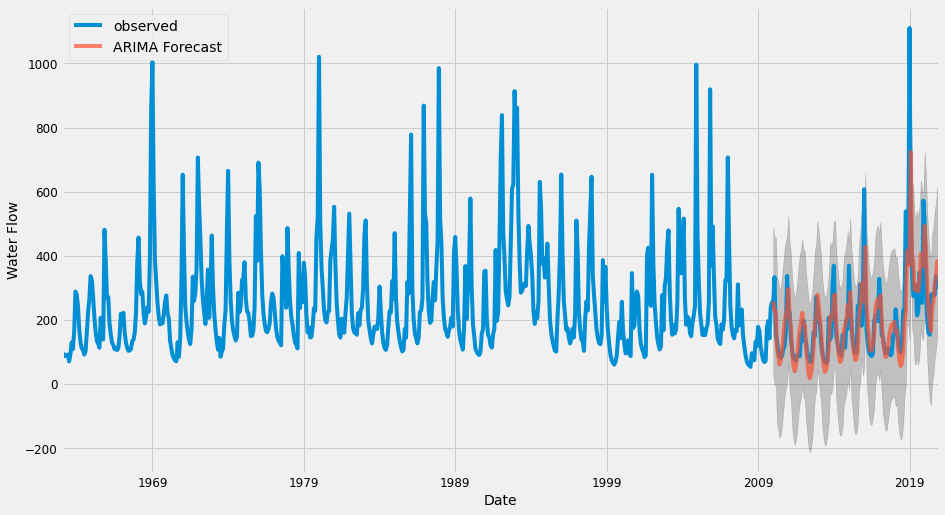

In [138]:
pred = model.get_prediction(start=pd.to_datetime('2010-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1963':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='ARIMA Forecast', alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()

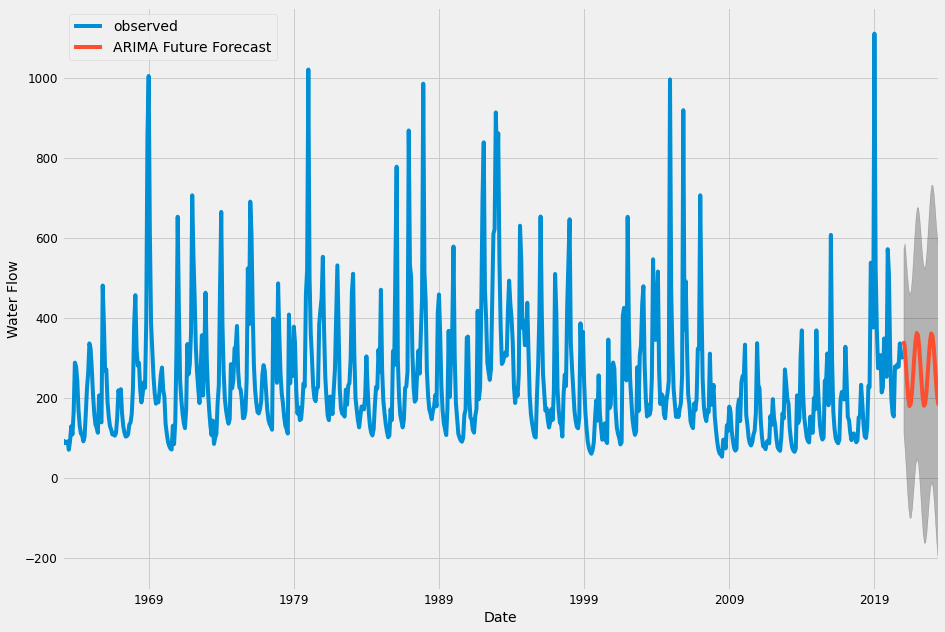

In [139]:
#Producing and visualizing forecasts
pred_uc = model.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 10))
pred_uc.predicted_mean.plot(ax=ax, label='ARIMA Future Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Water Flow')
plt.legend()
plt.show()


# GAUSSIAN IMPLEMENTATION 

In [230]:
import numpy as np
X = np.linspace(0.0, 696.0, num = 696)

In [231]:
X = np.atleast_2d(X).T#
X = X.reshape(-1,1)

In [232]:
#test train val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [245]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel

k0 = WhiteKernel()

k1 = ConstantKernel()*\
  ExpSineSquared(length_scale=1,length_scale_bounds='fixed')

kernel_1  = k0 + k1 
model = GaussianProcessRegressor(n_restarts_optimizer=8, kernel=kernel_1)

In [246]:
#fitting model on train data
model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=WhiteKernel(noise_level=1) + 1**2 * ExpSineSquared(length_scale=1, periodicity=1),
                         n_restarts_optimizer=8)

In [247]:
#predicting model on test data
testpreds = model.predict(X_test)

In [248]:
testlabels = y_test

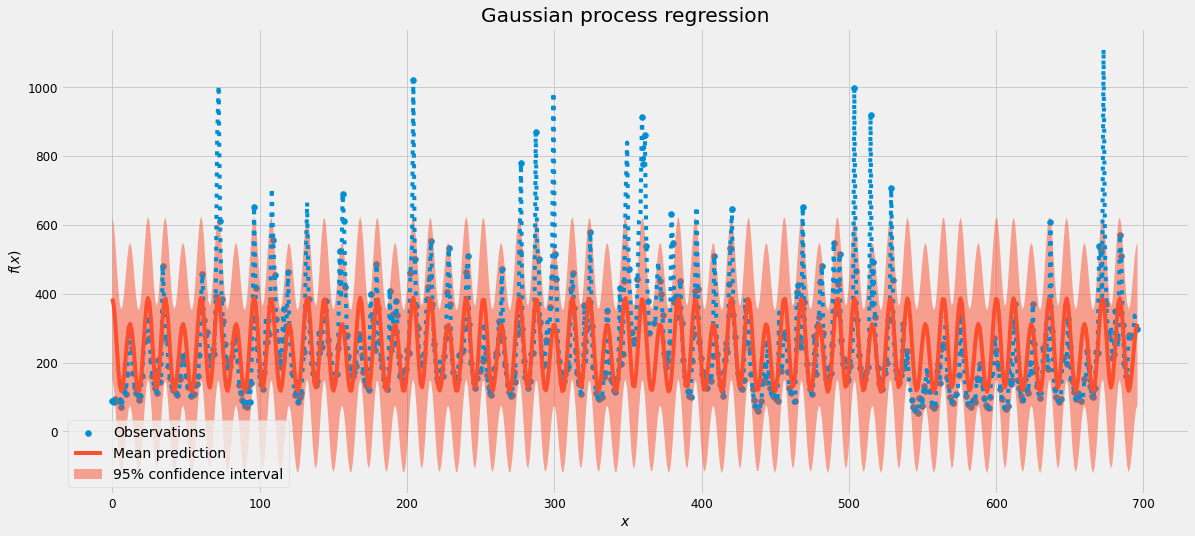

In [249]:
mean_prediction, std_prediction = model.predict(X, return_std=True)

plt.plot(X, y, linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression")

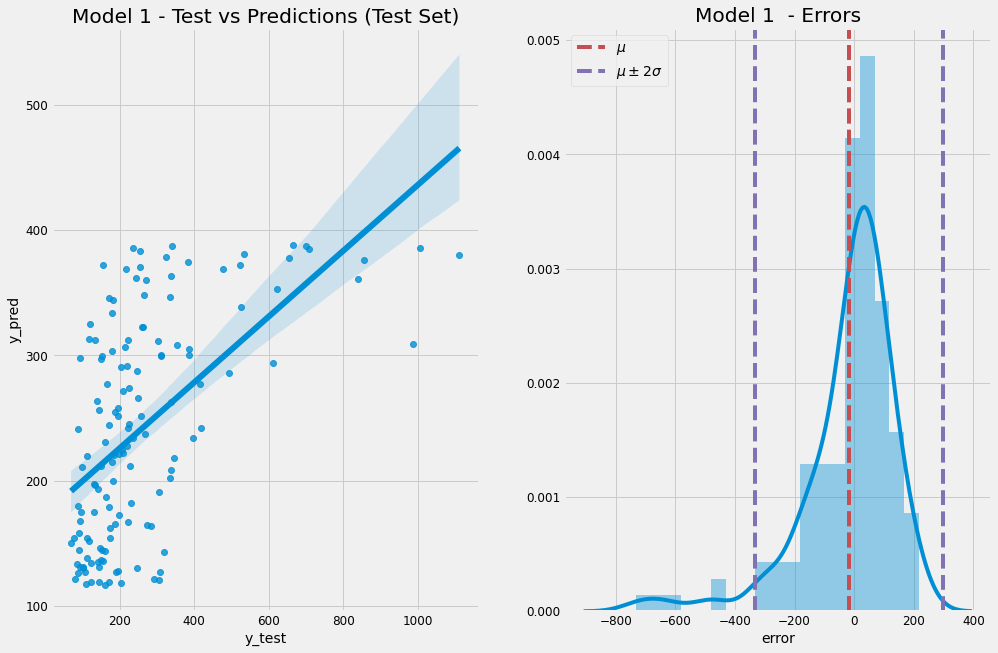

In [250]:
import seaborn as sns
errors = model.predict(X_test) - y_test
errors = errors.values.flatten()
errors_mean = errors.mean()
errors_std = errors.std()
sns_c = sns.color_palette(palette='deep')
fig, ax = plt.subplots(1, 2, figsize=(15, 10)) 
sns.regplot(x=y_test.values.flatten(), y=model.predict(X_test).flatten(), ax=ax[0])
sns.distplot(a=errors, ax=ax[1])
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2*errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2*errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')
ax[1].legend()
ax[0].set(title='Model 1 - Test vs Predictions (Test Set)', xlabel='y_test', ylabel='y_pred');
ax[1].set(title='Model 1  - Errors', xlabel='error', ylabel=None);

In [251]:
#predicting model on test data
testpreds = model.predict(X_test)

In [252]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(testlabels, testpreds, squared= False)
#print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

158.91081585422614

In [253]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(testlabels, testpreds)))

Root Mean Squared Error: 158.91081585422614


In [254]:
mape = np.mean(np.abs(testpreds - testlabels)/np.abs(testlabels))  # MEAN ABSOLUTE PERCENTAGE ERROR
mape

0.4267055417096117

In [255]:
mean_absolute_percentage_error(testlabels, testpreds)

0.4267055417096119

In [256]:
from sklearn.metrics import mean_absolute_error
print(f'R2 Score Train = {model.score(X=X_train, y=y_train): 0.3f}')
print(f'R2 Score Test = {model.score(X=X_test, y=y_test): 0.3f}')
print(f'MAE Train = {mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train)): 0.3f}')
print(f'MAE Test = {mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test)): 0.3f}')

R2 Score Train =  0.375
R2 Score Test =  0.305
MAE Train =  82.835
MAE Test =  103.970


In [257]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1, length_scale_bounds='fixed')
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

229**2 * RBF(length_scale=1)

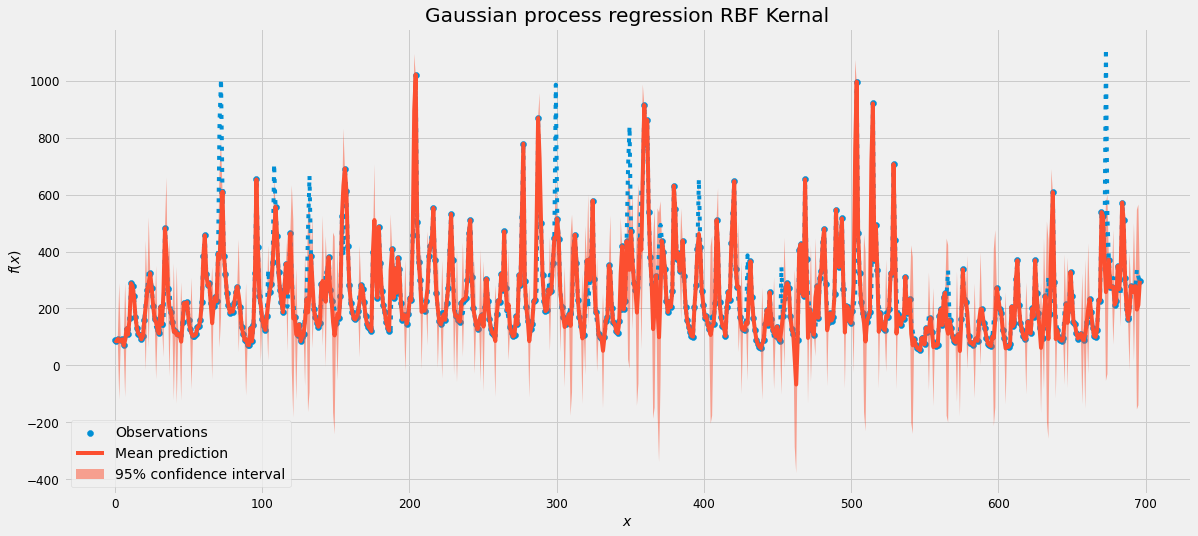

In [156]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression RBF Kernal")

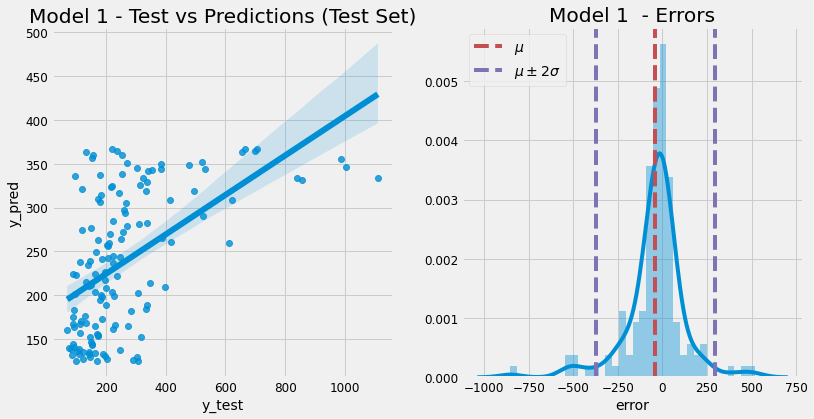

In [157]:
errors = gaussian_process.predict(X_test) - y_test
errors = errors.values.flatten()
errors_mean = errors.mean()
errors_std = errors.std()
sns_c = sns.color_palette(palette='deep')
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
sns.regplot(x=y_test.values.flatten(), y=model.predict(X_test).flatten(), ax=ax[0])
sns.distplot(a=errors, ax=ax[1])
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2*errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2*errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')
ax[1].legend()
ax[0].set(title='Model 1 - Test vs Predictions (Test Set)', xlabel='y_test', ylabel='y_pred');
ax[1].set(title='Model 1  - Errors', xlabel='error', ylabel=None);

In [158]:
#predicting model on test data
testpreds = gaussian_process.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(testlabels, testpreds, squared= False)

170.5347363576421

In [160]:
mean_absolute_percentage_error(testlabels, testpreds)

0.36192481252984116

In [161]:
from sklearn.metrics import mean_absolute_error
print(f'R2 Score Train = {gaussian_process.score(X=X_train, y=y_train): 0.3f}')
print(f'R2 Score Test = {gaussian_process.score(X=X_test, y=y_test): 0.3f}')
print(f'MAE Train = {mean_absolute_error(y_true=y_train, y_pred=gaussian_process.predict(X_train)): 0.3f}')
print(f'MAE Test = {mean_absolute_error(y_true=y_test, y_pred=gaussian_process.predict(X_test)): 0.3f}')

R2 Score Train =  1.000
R2 Score Test =  0.199
MAE Train =  0.000
MAE Test =  103.436


# LSTM IMPLEMENTAION

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [259]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [260]:
df= pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\d.csv", index_col='Year').dropna()

In [261]:
df

,flow
Year,
01/07/1963,54.30
02/07/1963,43.20
03/07/1963,56.40
04/07/1963,43.60
05/07/1963,51.60
...,...
18/05/2020,104.53
19/05/2020,92.61
20/05/2020,75.58


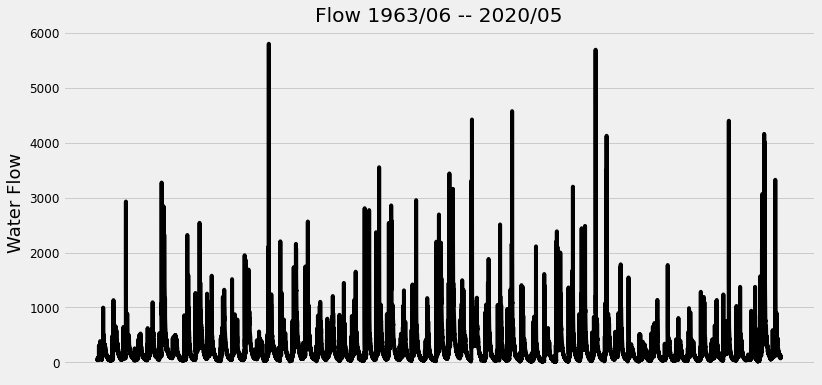

In [225]:
plt.figure(figsize=(12,6))
plt.title('Flow 1963/06 -- 2020/05')
plt.plot(df['flow'], color='black')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Water Flow', fontsize=18)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

In [262]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['flow'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

16625

In [263]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00762897],
       [0.00571093],
       [0.00799184],
       ...,
       [0.01130608],
       [0.00903554],
       [0.00839619]])

In [264]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00762897, 0.00571093, 0.00799184, 0.00578005, 0.00716242,
       0.01118858, 0.01191433, 0.01217352, 0.01198345, 0.01127498,
       0.01144778, 0.01160329, 0.01141322, 0.01144778, 0.00842384,
       0.01039372, 0.00527894, 0.00647123, 0.00654035, 0.00654035,
       0.00652307, 0.00645395, 0.00645395, 0.01153417, 0.01186249,
       0.01167241, 0.01165513, 0.00681683, 0.0069205 , 0.01177609,
       0.01167241, 0.00643667, 0.00666131, 0.00685139, 0.00673043,
       0.01160329, 0.00966797, 0.00864847, 0.00854479, 0.00963341,
       0.00864847, 0.00899406, 0.00806096, 0.00712786, 0.00721426,
       0.008372  , 0.01270919, 0.04412362, 0.05200314, 0.01201801,
       0.01067019, 0.01058379, 0.01072203, 0.00985805, 0.00882127,
       0.00989261, 0.00895951, 0.00989261, 0.01245   , 0.00997901])]
[0.011084903622681282]

[array([0.00762897, 0.00571093, 0.00799184, 0.00578005, 0.00716242,
       0.01118858, 0.01191433, 0.01217352, 0.01198345, 0.01127498,
       0.01144778, 0.01160329, 0.0

In [282]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=11)

Epoch 1/11
518/518 [==============================] - 19s 34ms/step - loss: 0.0010
Epoch 2/11
518/518 [==============================] - 18s 35ms/step - loss: 7.7752e-04
Epoch 3/11
518/518 [==============================] - 18s 36ms/step - loss: 7.7789e-04
Epoch 4/11
518/518 [==============================] - 20s 38ms/step - loss: 7.6541e-04 0s - loss:
Epoch 5/11
518/518 [==============================] - 19s 36ms/step - loss: 7.5370e-04
Epoch 6/11
518/518 [==============================] - 20s 38ms/step - loss: 7.4034e-04
Epoch 7/11
518/518 [==============================] - 20s 38ms/step - loss: 7.3685e-04
Epoch 8/11
518/518 [==============================] - 20s 38ms/step - loss: 7.2536e-04
Epoch 9/11
518/518 [==============================] - 22s 43ms/step - loss: 7.2519e-04
Epoch 10/11
518/518 [==============================] - 23s 45ms/step - loss: 7.3169e-04
Epoch 11/11
518/518 [==============================] - 20s 39ms/step - loss: 7.1728e-04


In [283]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

132.8149387789399

In [287]:
print('The LSTM Mean Aboslute Percentage Error of our forecasts is {}'.format(mean_absolute_percentage_error(predictions, y_test)))

The LSTM Mean Aboslute Percentage Error of our forecasts is 0.23869448414581113


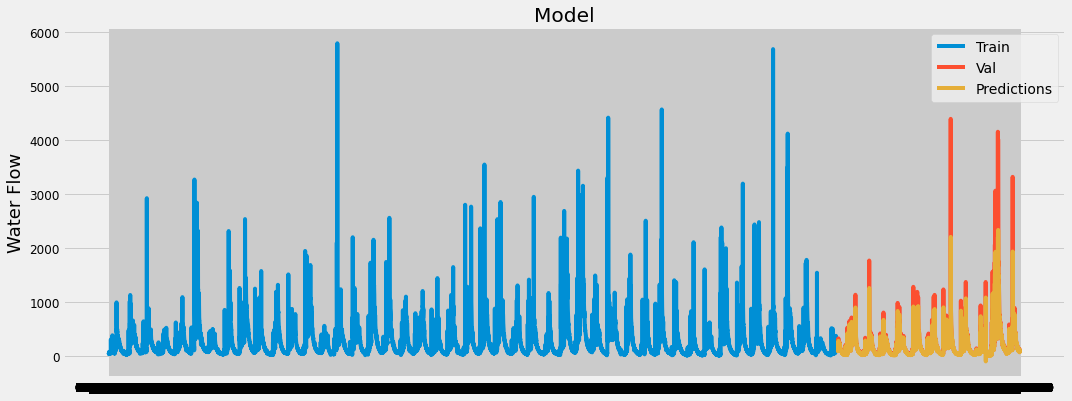

In [288]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
#plt.xlabel('Date', fontsize=18)
plt.ylabel('Water Flow', fontsize=18)
plt.plot(train['flow'])
plt.plot(valid[['flow', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

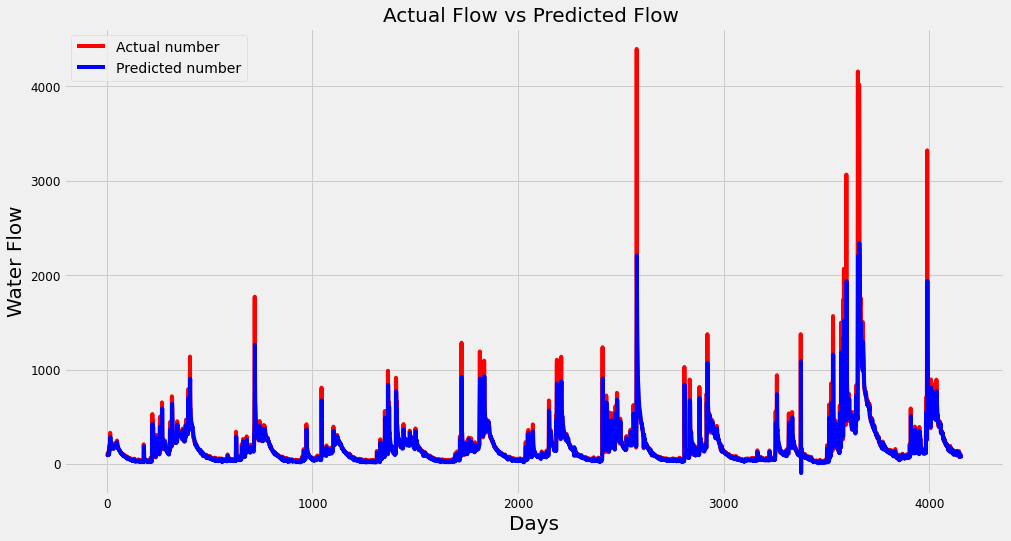

In [290]:
# Visualize the results
plt.figure(figsize=(15,8))
plt.plot(y_test, color='red',label='Actual number')
plt.plot(predictions, color='blue',label='Predicted number')
plt.title('Actual Flow vs Predicted Flow ',fontsize = 20)
plt.xlabel('Days',fontsize = 20)
plt.ylabel('Water Flow',fontsize = 20)
plt.legend()
plt.show()